In [1]:
%pip install seaborn
%pip install panda
%pip install matplotlib
%pip install plotly.express
%pip install plotly.graph_objects

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
U

ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects


Procesamiento de datos
El dataset seleccionado deberá ser limpiado, transformado y adaptado para su análisis posterior.

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Ruta completa o el nombre del archivo si está en la misma carpeta
ruta_del_archivo = r'C:\Users\geoco\OneDrive\Escritorio\UIDE\Practicas\Analisis_datos_proyecto\Trabajo3B\Dataset.csv' #cambiar el nombre del archivo y la ruta

# Lee el archivo CSV y lo carga en un DataFrame
df = pd.read_csv(ruta_del_archivo)

# Vista general
df.head()

,Incident_ID,Date_Reported,Company_Name,Industry,Country,Attack_Type,Records_Compromised,Attack_Vector,Data_Types_Stolen,Ransom_Amount_USD,...,Patch_Status,MFA_Enabled,Security_Training_Hours,Incident_Severity,Attribution,Response_Time_Hours,Regulatory_Fine_Million_USD,Stock_Impact_Percent,Customer_Churn_Percent,Reputation_Score_Change
0,CYB_001,2024-01-15,HealthTech Solutions,Healthcare,United States,Ransomware,2400000,Phishing_Email,"PII,PHI,Financial",2.5,...,Outdated,No,8,Critical,APT29,72,8.5,-12.3,15.2,-25
1,CYB_002,2024-01-22,GlobalBank Corp,Financial,United Kingdom,Data_Breach,890000,SQL_Injection,"Financial,PII",0.0,...,Current,Yes,24,High,Unknown,12,15.2,-8.7,8.9,-18
2,CYB_003,2024-02-03,EduPlatform Inc,Education,Canada,Ransomware,567000,Remote_Access,"PII,Academic_Records",1.2,...,Outdated,No,4,High,Conti,96,2.1,-5.4,12.1,-15
3,CYB_004,2024-02-14,RetailGiant Ltd,Retail,Australia,Payment_Fraud,1200000,Card_Skimming,"Payment_Cards,PII",0.0,...,Current,Partial,12,High,Organized_Crime,6,0.0,-3.2,6.7,-8
4,CYB_005,2024-02-28,TechStartup Pro,Technology,Germany,Insider_Threat,45000,Privileged_Access,"IP,Customer_Data",0.0,...,Current,Yes,16,Medium,Employee,24,0.0,-1.8,3.4,-5


In [6]:
df.shape

(25, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Incident_ID                   25 non-null     object 
 1   Date_Reported                 25 non-null     object 
 2   Company_Name                  25 non-null     object 
 3   Industry                      25 non-null     object 
 4   Country                       25 non-null     object 
 5   Attack_Type                   25 non-null     object 
 6   Records_Compromised           25 non-null     int64  
 7   Attack_Vector                 25 non-null     object 
 8   Data_Types_Stolen             25 non-null     object 
 9   Ransom_Amount_USD             25 non-null     float64
 10  Recovery_Time_Days            25 non-null     int64  
 11  Financial_Impact_Million_USD  25 non-null     float64
 12  CISO_Present                  25 non-null     object 
 13  Securit

In [8]:
df.describe() #estadisitica base para todas

,Records_Compromised,Ransom_Amount_USD,Recovery_Time_Days,Financial_Impact_Million_USD,Security_Budget_Million_USD,Employee_Count,Previous_Incidents,Security_Training_Hours,Response_Time_Hours,Regulatory_Fine_Million_USD,Stock_Impact_Percent,Customer_Churn_Percent,Reputation_Score_Change
count,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.575600e+06,2.078000,48.160000,170.952000,18.048000,13193.200000,1.040000,17.360000,64.720000,15.604000,-10.288000,13.096000,-24.840000
std,2.573331e+06,9.093291,43.219093,161.195984,18.119122,13937.558287,0.934523,10.765996,60.166103,23.657988,7.907608,10.076643,12.334504
min,0.000000e+00,0.000000,5.000000,12.300000,0.800000,340.000000,0.000000,2.000000,2.000000,0.000000,-35.600000,0.000000,-55.000000
25%,1.250000e+05,0.000000,18.000000,67.800000,3.200000,1200.000000,0.000000,8.000000,12.000000,0.000000,-13.400000,6.700000,-35.000000
50%,8.900000e+05,0.000000,30.000000,89.700000,12.300000,8900.000000,1.000000,16.000000,48.000000,8.500000,-8.900000,12.100000,-25.000000
75%,2.100000e+06,0.000000,65.000000,234.500000,23.400000,18900.000000,2.000000,24.000000,96.000000,15.600000,-4.500000,16.900000,-16.000000
max,1.200000e+07,45.600000,180.000000,567.800000,67.800000,45000.000000,3.000000,40.000000,240.000000,89.500000,0.000000,45.200000,-5.000000


In [9]:
df.groupby(['Attack_Vector'])['Country'].sum()
#Agrupamos el ataque por pasís

Attack_Vector
API_Attack             United Kingdom
APT_Attack                      Japan
BEC_Attack              United States
Card_Skimming               Australia
Credential_Stuffing           Ireland
DRM_Bypass              United States
Database_Breach           South Korea
Drone_Hack                  Australia
IoT_Vulnerability         Netherlands
Malware                         Spain
Misconfiguration        United States
Mobile_App                      India
Network_Intrusion       United States
Phishing_Email          United States
Privileged_Access             Germany
Remote_Access                  Canada
SQL_Injection          United Kingdom
Smart_Contract              Singapore
Social_Engineering      United States
Spear_Phishing          United States
Third_Party               Switzerland
V2X_Attack                    Germany
Web_Application                France
Wire_Fraud              United States
Zero_Day                       Brazil
Name: Country, dtype: object

In [10]:
df.groupby(["Attack_Vector", "Country"])[["Country"]].count()
#Agrupacion por tipo de atque por país, y cuantas veces fue atacado en ese país
#ese ataque


,,Country
Attack_Vector,Country,
API_Attack,United Kingdom,1
APT_Attack,Japan,1
BEC_Attack,United States,1
Card_Skimming,Australia,1
Credential_Stuffing,Ireland,1
DRM_Bypass,United States,1
Database_Breach,South Korea,1
Drone_Hack,Australia,1
IoT_Vulnerability,Netherlands,1


In [11]:
df.groupby(["Country", "Industry"])[["Industry"]].count()
#Agrupacion por país y que tipo de industria es donde hacen el ataque
# y cuantas industria fueron atacas en ese país
#ese ataque

Industry
Country        Industry                    
Australia      Agriculture                1
               Retail                     1
Brazil         Telecommunications         1
Canada         Education                  1
France         Transportation             1
Germany        Automotive                 1
               Technology                 1
India          Technology                 1
Ireland        Technology                 1
Japan          Manufacturing              1
Netherlands    Government                 1
Singapore      Financial                  1
South Korea    Entertainment              1
Spain          Hospitality                1
Switzerland    Healthcare                 1
United Kingdom Financial                  2
United States  Energy                     1
               Entertainment              1
               Healthcare                 1
               Insurance                  1
               Legal                      1
               Pharmaceutical             1
               Real Estate                1
               Technology                 1

In [12]:
df.groupby(["Attack_Vector", "Country"])[["Country"]].agg(["count"])
#agrupamos  por tipo de ataque y el país y cunatas veces fue atacado en ese país
#con ese ataque

,,Country
,,count
Attack_Vector,Country,
API_Attack,United Kingdom,1
APT_Attack,Japan,1
BEC_Attack,United States,1
Card_Skimming,Australia,1
Credential_Stuffing,Ireland,1
DRM_Bypass,United States,1
Database_Breach,South Korea,1
Drone_Hack,Australia,1


In [13]:
df.groupby(["Country", "Industry"])[["Industry"]].agg(["count"])
# Agrupamiento de industria por Pais

Industry
                                     count
Country        Industry                   
Australia      Agriculture               1
               Retail                    1
Brazil         Telecommunications        1
Canada         Education                 1
France         Transportation            1
Germany        Automotive                1
               Technology                1
India          Technology                1
Ireland        Technology                1
Japan          Manufacturing             1
Netherlands    Government                1
Singapore      Financial                 1
South Korea    Entertainment             1
Spain          Hospitality               1
Switzerland    Healthcare                1
United Kingdom Financial                 2
United States  Energy                    1
               Entertainment             1
               Healthcare                1
               Insurance                 1
               Legal                     1
               Pharmaceutical            1
               Real Estate               1
               Technology                1

In [14]:
%pip install sns

Note: you may need to restart the kernel to use updated packages.


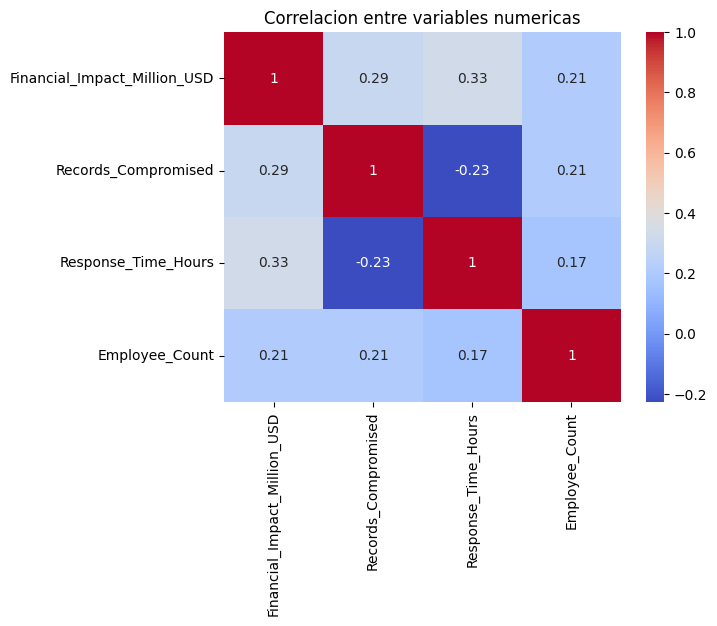

In [15]:
sns.heatmap(df[['Financial_Impact_Million_USD','Records_Compromised','Response_Time_Hours','Employee_Count']].corr(), cmap='coolwarm', annot=True)
plt.title('Correlacion entre variables numericas')
plt.show()
#Correlacion entre Impacto de dinero de perdida, registros comprometidos,con el número de empleados, y el tiempo de respuestas 
#para solventar el incidente

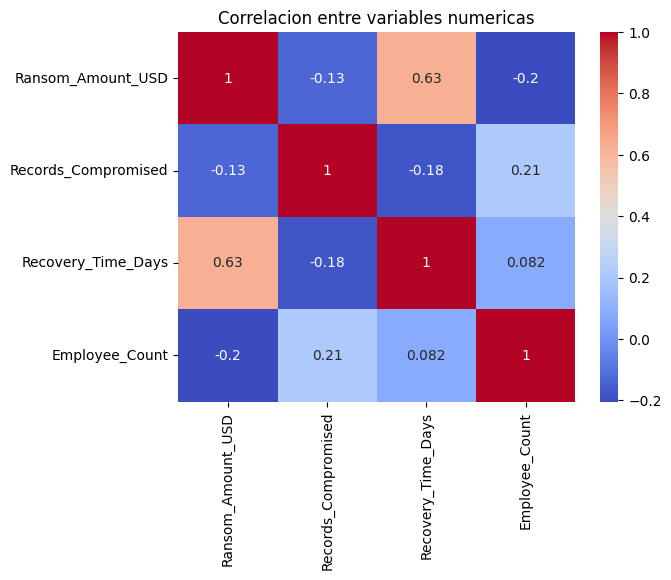

In [16]:
sns.heatmap(df[['Ransom_Amount_USD','Records_Compromised','Recovery_Time_Days','Employee_Count']].corr(), cmap='coolwarm', annot=True)
plt.title('Correlacion entre variables numericas')
plt.show()
#Correlacion entre el dinero que uso para el rescate, con los registros comprometidos
#el tiempo que duro en recuperase, el número de empleados

In [17]:
# Eliminar columnas poco útiles
df_clean = df.drop(columns=["MFA_Enabled", "Reputation_Score_Change","Incident_ID","CISO_Present", "Patch_Status",
                            "Security_Training_Hours", "Attribution"])

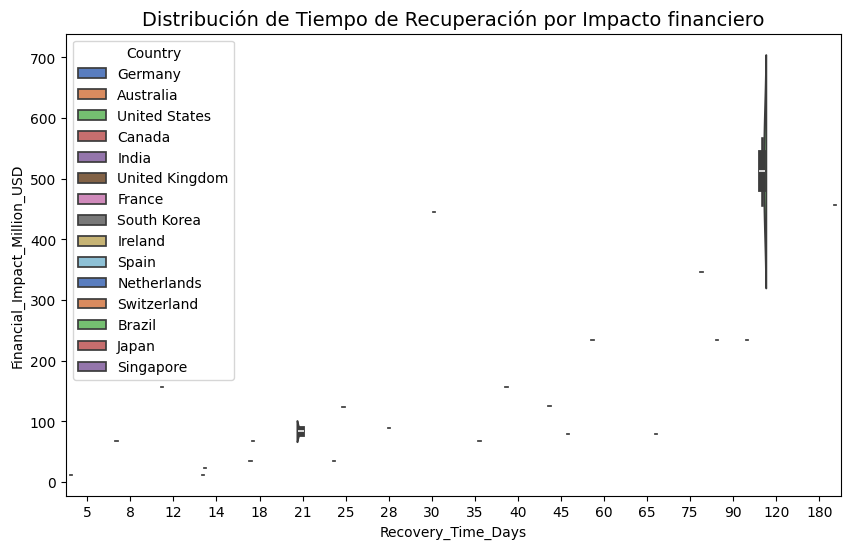

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_clean, x="Recovery_Time_Days", y="Financial_Impact_Million_USD", hue="Country", split=True, palette="muted")
plt.title("Distribución de Tiempo de Recuperación por Impacto financiero", fontsize=14)
plt.show()

Se incorporo **gráficos adicionales y análisis más profundos** para respaldar de forma clara y visual las conclusiones.  
A continuación se presentan las celdas de código utilizadas para generar dichos resultados:

**1. Incidentes por país**

**Interpretación:**  
Cada barra representa la **cantidad de incidentes de ciberseguridad** reportados en cada país durante 2024.  
Se observa que Estados Unidos concentra el mayor número de casos, afectando a múltiples sectores.

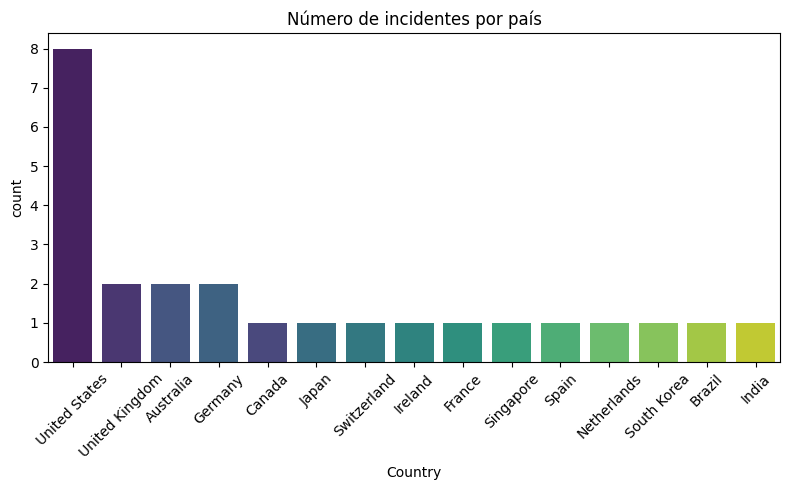

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns 

# 1. Incidentes por país
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Country',
    hue='Country',
    data=df,
    order=df['Country'].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Número de incidentes por país")
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar con resolución adecuada
plt.savefig("images/incidentes_por_pais.png", dpi=300) 


**2. Impacto financiero vs Registros comprometidos**

**Interpretación:**  
Cada punto representa un **incidente de ciberseguridad**.  
- **Eje X:** número de registros comprometidos.  
- **Eje Y:** impacto financiero en millones de USD.  
- **Color:** sector o industria afectada.  

La gráfica muestra que, en general, a mayor número de registros comprometidos, mayor es la pérdida financiera.


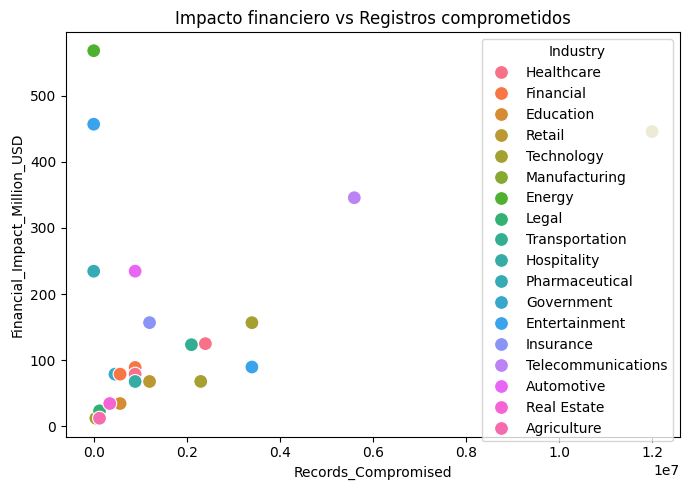

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Records_Compromised',
    y='Financial_Impact_Million_USD',
    hue='Industry',
    data=df,
    s=100
)
plt.title("Impacto financiero vs Registros comprometidos")
plt.tight_layout()

# Guardar antes de mostrar
plt.savefig("images/impacto_vs_registros.png", dpi=300)
plt.show()

**3. Tiempo de respuesta vs. Pérdida de clientes**

**Interpretación:**  
Cada punto representa un **incidente reportado**.  
- **Eje X:** tiempo de respuesta en horas.  
- **Eje Y:** porcentaje de pérdida de clientes.  

Se observa que los tiempos de respuesta más altos tienden a incrementar la pérdida de clientes, afectando la reputación y sostenibilidad de las organizaciones.

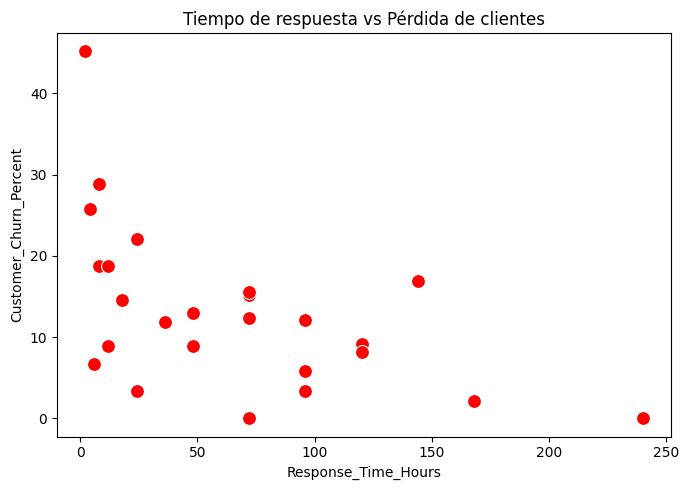

In [43]:

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Response_Time_Hours', 
    y='Customer_Churn_Percent', 
    data=df, s=100, 
    color="red")
plt.title("Tiempo de respuesta vs Pérdida de clientes")
plt.tight_layout()

plt.savefig("images/respuesta_vs_clientes.png")
plt.show()



**4. Monto del rescate vs. Tiempo de recuperación**

**Interpretación:**  
Cada punto representa un **ataque con demanda de rescate**.  
- **Eje X:** monto del rescate exigido en USD.  
- **Eje Y:** tiempo de recuperación en días.  

La tendencia refleja que montos de rescate más elevados suelen asociarse con tiempos de recuperación más largos.

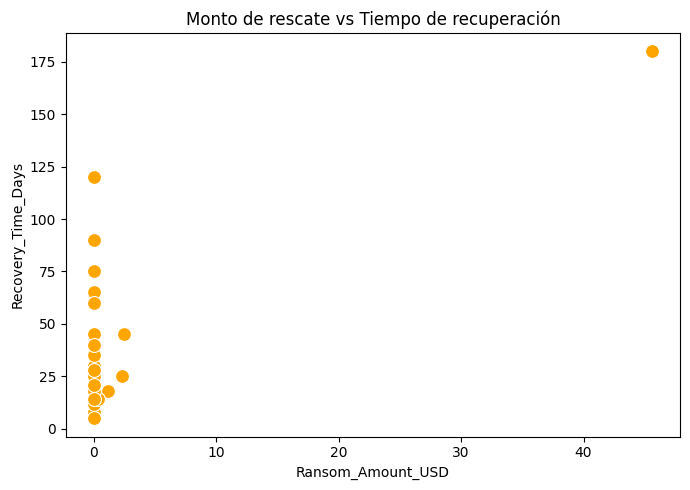

In [45]:

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Ransom_Amount_USD', 
    y='Recovery_Time_Days', 
    data=df, s=100, 
    color="orange")
plt.title("Monto de rescate vs Tiempo de recuperación")
plt.tight_layout()

plt.savefig("images/rescate_vs_recuperacion.png")
plt.show()

**5. Presupuesto en seguridad vs. Impacto financiero**

**Interpretación:**  
Cada punto corresponde a un **incidente en una organización**.  
- **Eje X:** presupuesto en seguridad (millones de USD).  
- **Eje Y:** pérdidas financieras por el ataque (millones de USD).  
- **Color:** sector o industria afectada.  

Se observa que empresas con menor inversión en seguridad suelen presentar un mayor impacto financiero tras un ataque.

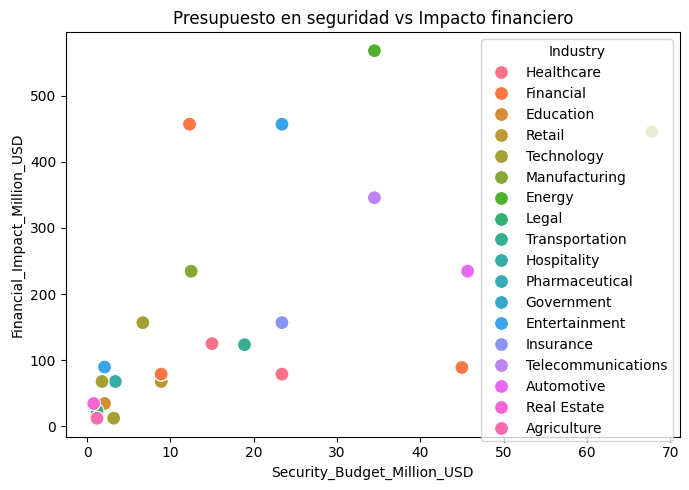

In [47]:

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Security_Budget_Million_USD', 
    y='Financial_Impact_Million_USD', 
    data=df, hue='Industry', 
    s=100
    )
plt.title("Presupuesto en seguridad vs Impacto financiero")
plt.tight_layout()

plt.savefig("images/presupuesto_vs_impacto.png")
plt.show()